In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df = df.drop(["day", "month", "poutcome", "pdays"], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  previous   4521 non-null   int64 
 12  y          4521 non-null   object
dtypes: int64(5), object(8)
memory usage: 459.3+ KB


In [5]:
df.describe()

,age,balance,duration,campaign,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,0.542579
std,10.576211,3009.638142,259.856633,3.109807,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,25.000000


In [109]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
previous     0
y            0
dtype: int64

In [110]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
numerical = [i for i in df.columns if df[i].dtype != 'O']

# Exploring the categorical values

In [111]:
df[categorical].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
y            0
dtype: int64

In [112]:
for i in categorical:
    print()
    print("column name: "+i)
    print()
    print(df[i].value_counts())
print()    


column name: job

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

column name: marital

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

column name: education

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

column name: default

no     4445
yes      76
Name: default, dtype: int64

column name: housing

yes    2559
no     1962
Name: housing, dtype: int64

column name: loan

no     3830
yes     691
Name: loan, dtype: int64

column name: contact

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

column name: y

no     4000
yes     521
Name: y, dtype: int64



In [113]:
df["job"].replace(["unknown"], df["job"].mode(), inplace = True)

In [114]:
df["education"].replace(["unknown"], df["education"].mode(), inplace = True)
df["contact"].replace(["unknown"], df["contact"].mode(), inplace = True)

In [115]:
for i in categorical:
    print()
    print("column name: "+i)
    print()
    print(df[i].value_counts())
print()    


column name: job

management       1007
blue-collar       946
technician        768
admin.            478
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
Name: job, dtype: int64

column name: marital

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

column name: education

secondary    2493
tertiary     1350
primary       678
Name: education, dtype: int64

column name: default

no     4445
yes      76
Name: default, dtype: int64

column name: housing

yes    2559
no     1962
Name: housing, dtype: int64

column name: loan

no     3830
yes     691
Name: loan, dtype: int64

column name: contact

cellular     4220
telephone     301
Name: contact, dtype: int64

column name: y

no     4000
yes     521
Name: y, dtype: int64



In [116]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['contact'] = df['contact'].map({'telephone': 1, 'cellular': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [117]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,30,unemployed,married,primary,0,1787,0,0,0,79,1,0,0
1,33,services,married,secondary,0,4789,1,1,0,220,1,4,0
2,35,management,single,tertiary,0,1350,1,0,0,185,1,1,0
3,30,management,married,tertiary,0,1476,1,1,0,199,4,0,0
4,59,blue-collar,married,secondary,0,0,1,0,0,226,1,0,0


In [118]:
df = pd.get_dummies(df, columns = ["job", "marital", "education"])

In [119]:
df.head()

,age,default,balance,housing,loan,contact,duration,campaign,previous,y,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,30,0,1787,0,0,0,79,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,33,0,4789,1,1,0,220,1,4,0,...,1,0,0,0,0,1,0,0,1,0
2,35,0,1350,1,0,0,185,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,30,0,1476,1,1,0,199,4,0,0,...,0,0,0,0,0,1,0,0,0,1
4,59,0,0,1,0,0,226,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [120]:
df[numerical].isnull().sum()

age         0
balance     0
duration    0
campaign    0
previous    0
dtype: int64

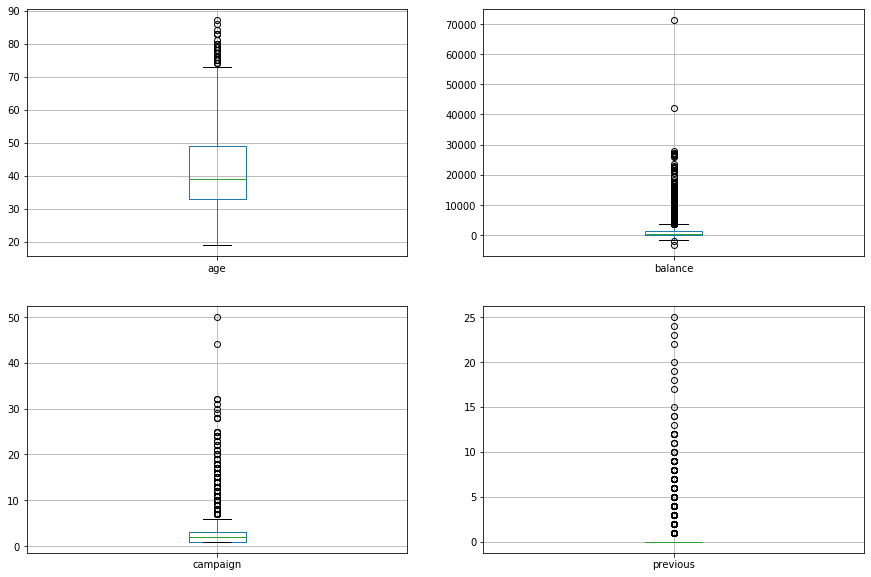

In [121]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df.boxplot(column = ['age'])
# fig.set_title("Pregnancies")

plt.subplot(2,2,2)
fig = df.boxplot(['balance'])
# fig.set_title("Glucose")


plt.subplot(2,2,3)
fig = df.boxplot(['campaign'])
# fig.set_title("BloodPressure")


plt.subplot(2,2,4)
fig = df.boxplot(['previous'])
# fig.set_title("SkinThickness")


In [122]:
iqr = df["age"].quantile(0.75) - df["age"].quantile(0.25)
min_val = df["age"].quantile(0.25) - (iqr * 1.5)
max_val = df["age"].quantile(0.75) + (iqr * 1.5)

min_val, max_val

(9.0, 73.0)

In [123]:
iqr = df["balance"].quantile(0.75) - df["balance"].quantile(0.25)
min_val = df["balance"].quantile(0.25) - (iqr * 1.5)
max_val = df["balance"].quantile(0.75) + (iqr * 1.5)

min_val, max_val

(-2047.5, 3596.5)

In [124]:
iqr = df["campaign"].quantile(0.75) - df["campaign"].quantile(0.25)
min_val = df["campaign"].quantile(0.25) - (iqr * 1.5)
max_val = df["campaign"].quantile(0.75) + (iqr * 1.5)

min_val, max_val

(-2.0, 6.0)

In [125]:
iqr = df["previous"].quantile(0.75) - df["previous"].quantile(0.25)
min_val = df["previous"].quantile(0.25) - (iqr * 1.5)
max_val = df["previous"].quantile(0.75) + (iqr * 1.5)

min_val, max_val, iqr

(0.0, 0.0, 0.0)

In [126]:
def outliers(df1, col, max_val):
    
    return np.where(df1[col] > max_val, max_val, df1[col])
  
df["age"] = outliers(df, "age", 73)
df["balance"] = outliers(df, "balance", 3596.5)
df["campaign"] = outliers(df, "campaign", 6.0)


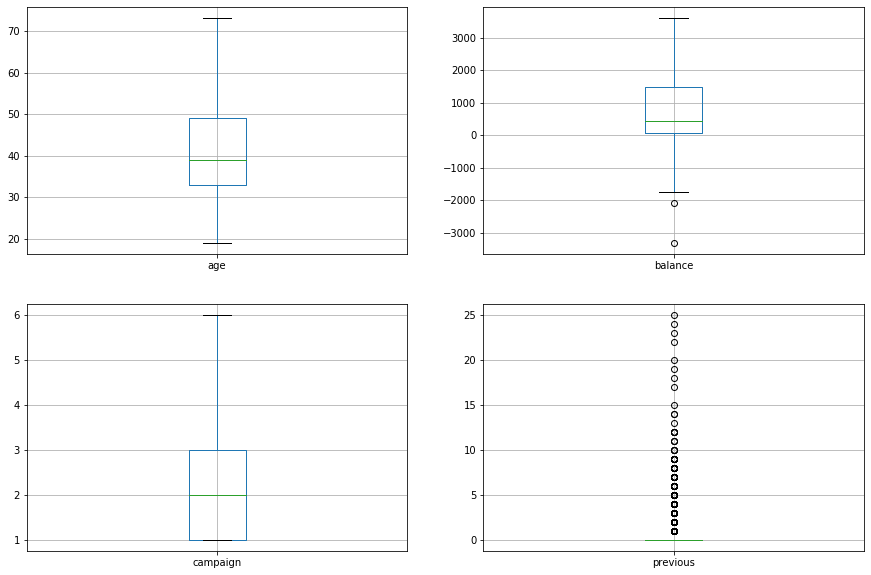

In [127]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df.boxplot(column = ['age'])
# fig.set_title("Pregnancies")

plt.subplot(2,2,2)
fig = df.boxplot(['balance'])
# fig.set_title("Glucose")


plt.subplot(2,2,3)
fig = df.boxplot(['campaign'])
# fig.set_title("BloodPressure")


plt.subplot(2,2,4)
fig = df.boxplot(['previous'])
# fig.set_title("SkinThickness")


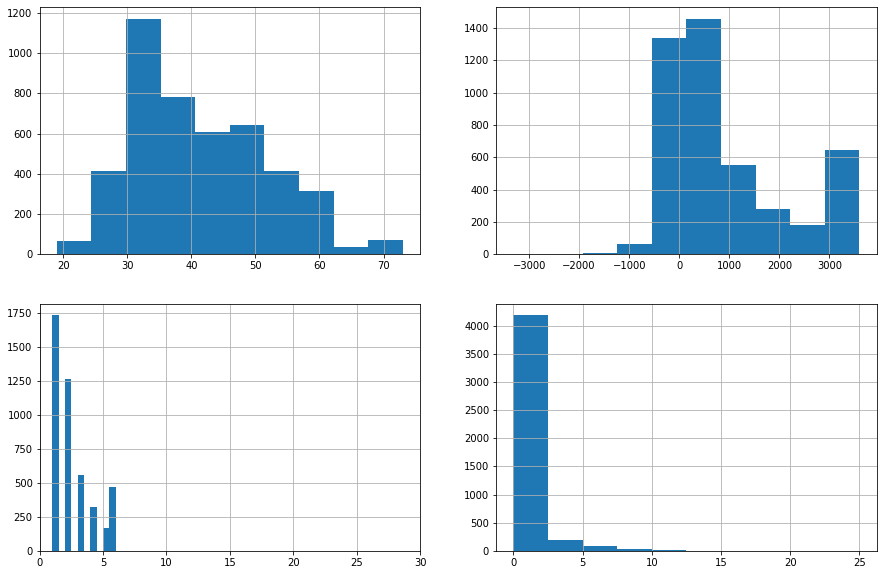

In [128]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
fig = df['age'].hist(bins=10)
# fig.set_title("Pregnancies")

plt.subplot(2,2,2)
fig = df['balance'].hist(bins=10)
# fig.set_title("Glucose")

plt.subplot(2,2,3)
fig = df['campaign'].hist(bins=10)
plt.xlim([0, 30])
# fig.set_title("BloodPressure")

plt.subplot(2,2,4)
fig = df['previous'].hist(bins=10)
# fig.set_title("SkinThickness")


In [129]:
df.head()

,age,default,balance,housing,loan,contact,duration,campaign,previous,y,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,30,0,1787.0,0,0,0,79,1.0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,33,0,3596.5,1,1,0,220,1.0,4,0,...,1,0,0,0,0,1,0,0,1,0
2,35,0,1350.0,1,0,0,185,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,30,0,1476.0,1,1,0,199,4.0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,59,0,0.0,1,0,0,226,1.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [131]:
x = df.drop("y", axis = 1)
y = df["y"]

In [139]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [140]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "liblinear", random_state = 0)

logreg.fit(xtrain, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
y_pred = logreg.predict(xtest)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.8762157382847038

In [144]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

In [145]:
train, test

(0.8949852507374632, 0.8762157382847038)

In [146]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, xtest, ytest, cv = 5, scoring = "accuracy")

array([0.88546256, 0.87168142, 0.86725664, 0.87610619, 0.88495575])

In [154]:
param = [{"penalty": ["l1", "l2"]},
         {"C": [1, 10, 100, 1000]}, 
         {"solver": ["liblinear", "saga", "lbfgs"]}
       ]

In [155]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(xtest, ytest)

C:\Users\Mathan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]},
                         {'solver': ['liblinear', 'saga', 'lbfgs']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [156]:
grid_search.best_score_

0.8770925110132157

In [157]:
grid_search.best_params_

{'penalty': 'l1'}

In [158]:
y_pred_prob = logreg.predict_proba(xtest)[0:10]

y_pred_prob

array([[0.9370443 , 0.0629557 ],
       [0.98598149, 0.01401851],
       [0.984993  , 0.015007  ],
       [0.84010798, 0.15989202],
       [0.94332186, 0.05667814],
       [0.3058664 , 0.6941336 ],
       [0.89342827, 0.10657173],
       [0.9263732 , 0.0736268 ],
       [0.9886996 , 0.0113004 ],
       [0.29316046, 0.70683954]])

In [159]:
logreg_best = LogisticRegression(penalty = "l1", solver = "liblinear", random_state = 2)

logreg_best.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
logreg_best.score(xtrain, ytrain), logreg_best.score(xtest, ytest)

(0.8949852507374632, 0.8762157382847038)